In [16]:
# import library
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [2]:
data = pd.read_csv('health care diabetes.csv')

****************Question******************* 

1. Perform descriptive analysis. Understand the variables and their corresponding values. 

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.shape

(768, 9)

In [7]:
data.size

6912

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [13]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [15]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

***************************Question**************************

On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

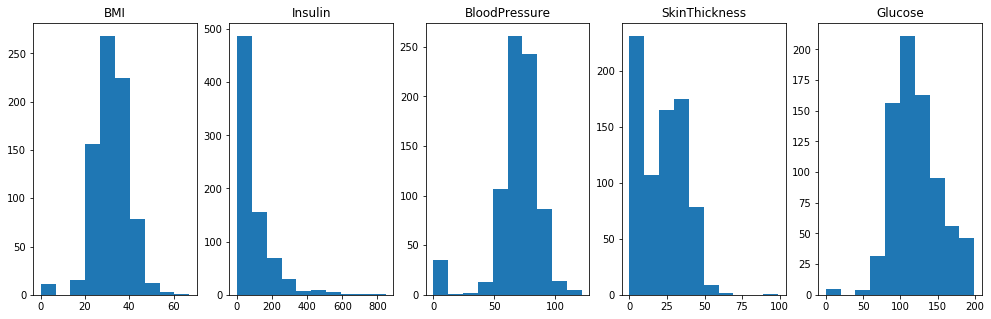

In [37]:
plt.figure(figsize=(17,5))
plt.subplot(1, 5, 1)
plt.hist(data['BMI'])
plt.title('BMI')


plt.subplot(1, 5, 2)
plt.hist(data['Insulin'])
plt.title('Insulin')

plt.subplot(1, 5, 3)
plt.hist(data['BloodPressure'])
plt.title('BloodPressure')

plt.subplot(1, 5, 4)
plt.hist(data['SkinThickness'])
plt.title('SkinThickness')

plt.subplot(1, 5, 5)
plt.hist(data['Glucose'])
plt.title('Glucose')


plt.show()

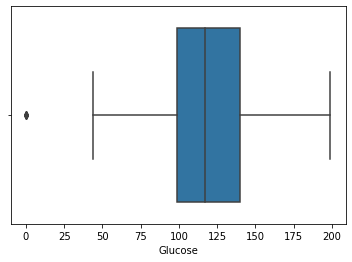

In [39]:
sns.boxplot(data['Glucose'])



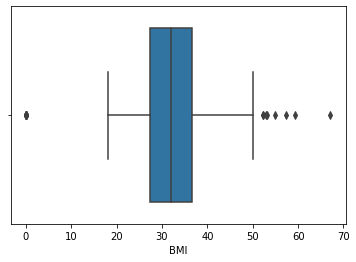

In [40]:
sns.boxplot(data['BMI'])

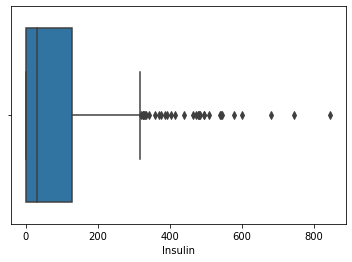

In [41]:
sns.boxplot(data['Insulin'])

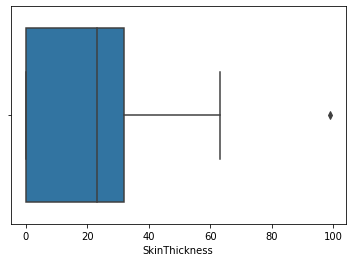

In [42]:
sns.boxplot(data['SkinThickness'])

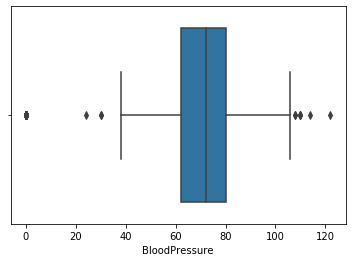

In [43]:
sns.boxplot(data['BloodPressure'])

FOr Insulin  we will replace with median due to skewness of data and for rest of the 4 we will replace with mean

In [62]:
data['Insulin'] = data['Insulin'].replace(to_replace=0,value=data['Insulin'].median())
data['BloodPressure'] = data['BloodPressure'].replace(to_replace=0,value=data['BloodPressure'].mean())
data['BMI'] = data['BMI'].replace(to_replace=0,value=data['BMI'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(to_replace=0,value=data['SkinThickness'].mean())
data['Glucose'] = data['Glucose'].replace(to_replace=0,value=data['Glucose'].mean())


In [63]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1


In [64]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,30.5,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,30.5,30.4,0.315,23,0


*******************Question****************

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [67]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object